Data Scientist Final Portfolio Project
project completed for Codecademy Data Scientist Career Path on August 12, 2021
By David Hunger
Licensed to the public domain (CC0)

In [252]:
#Necessary imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef

In [253]:
#Initial analysis
df = pd.read_csv('ForbesAmericasTopColleges2019.csv')
display(df.head())
print(df.info())
print('\nNull Values:')
print(df.isnull().sum())
print('\nNumber of Duplicate Entries: '+str(df.duplicated().sum()))

#Convert public/private status to dummy variable
df['Private'] = df['Public/Private'].map({'Private':1,'Public':0})

#Describe summary stats
display(df.describe())

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      650 non-null    float64
 1   Name                      650 non-null    object 
 2   City                      647 non-null    object 
 3   State                     650 non-null    object 
 4   Public/Private            650 non-null    object 
 5   Undergraduate Population  650 non-null    float64
 6   Student Population        650 non-null    float64
 7   Net Price                 648 non-null    float64
 8   Average Grant Aid         646 non-null    float64
 9   Total Annual Cost         650 non-null    float64
 10  Alumni Salary             635 non-null    float64
 11  Acceptance Rate           648 non-null    float64
 12  SAT Lower                 551 non-null    float64
 13  SAT Upper                 551 non-null    float64
 14  ACT Lower 

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Private
count,650.00000,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000,650.000000
mean,325.50000,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230,0.615385
std,187.78312,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115,0.486879
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000,0.000000
25%,163.25000,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000,0.000000
50%,325.50000,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000,1.000000
75%,487.75000,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000,1.000000
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000,1.000000


Red line = Mean, Green line = Median


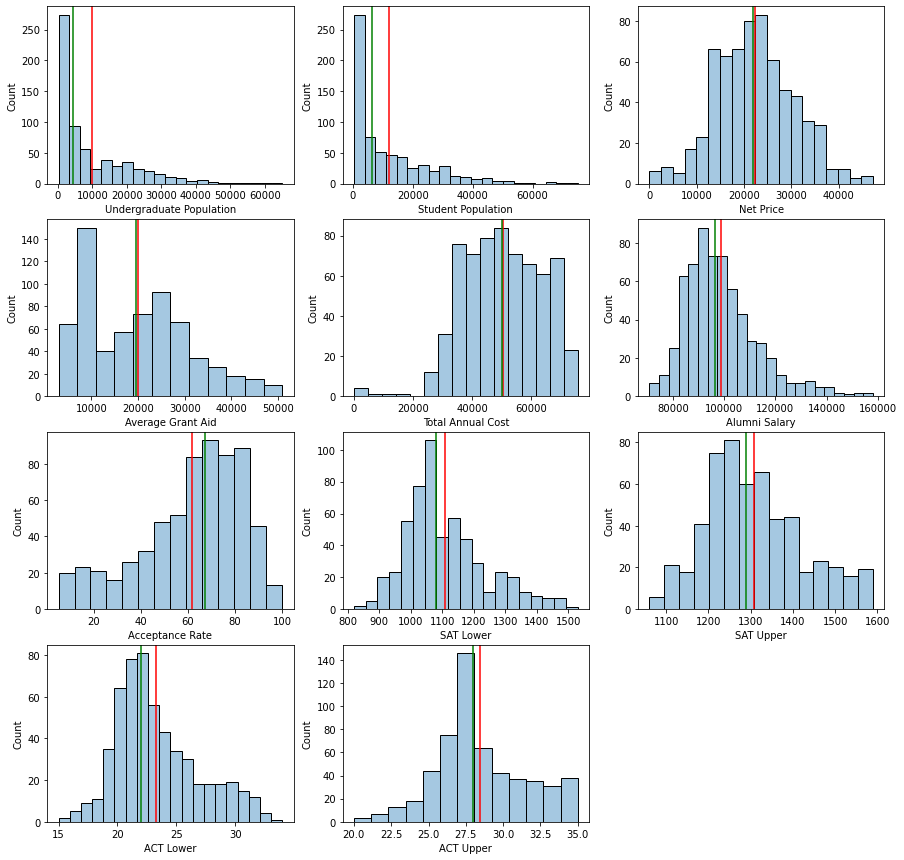

In [62]:
#Examine distributions of quantitative variables
quant_df = df[['Undergraduate Population', 'Student Population', 'Net Price', 'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary', 'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper']]
print('Red line = Mean, Green line = Median')
count = 1
figure = plt.figure(figsize=(15,15))
figure.tight_layout()
for col in quant_df:
    plt.subplot(4, 3, count)
    sns.histplot(quant_df[col], alpha=0.4)
    plt.axvline(quant_df[col].mean(), color='r')
    plt.axvline(quant_df[col].median(), color='g')
    count += 1
plt.show()

<AxesSubplot:title={'center':'Number of Colleges by State'}, xlabel='State', ylabel='Number of Colleges'>

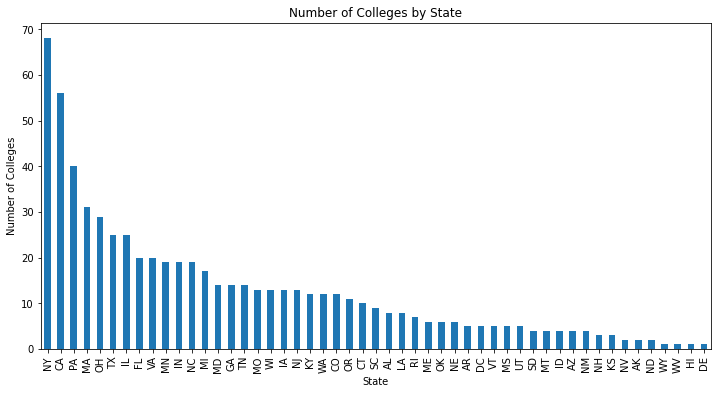

In [254]:
#Breakdown of colleges by state
fig2 = plt.figure(figsize=(12,6))
plt.xlabel('State')
plt.ylabel('Number of Colleges')
plt.title('Number of Colleges by State')
df['State'].value_counts().plot(kind='bar')

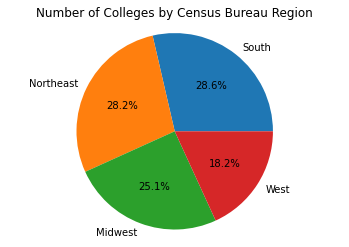

In [255]:
#Breakdown by region
northeast_states = ['NY', 'PA', 'MA', 'ME', 'RI', 'NH', 'VT', 'NJ', 'CT']
midwest_states = ['OH', 'IN', 'IL', 'MI', 'MO', 'KS', 'WI', 'NE', 'SD', 'ND', 'MN', 'IA']
south_states = ['VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'TN', 'KY', 'AR', 'LA', 'TX', 'DE', 'DC', 'MD', 'OK']
west_states = ['NM', 'CO', 'WY', 'MT', 'ID', 'UT', 'AZ', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
def region(state):
    if state in northeast_states: return 'Northeast'
    elif state in midwest_states: return 'Midwest'
    elif state in south_states: return 'South'
    else: return 'West'
df['Region'] = df['State'].apply(region)
df['Northeast'] = df['Region'].map({'Northeast':1,'Midwest':0,'South':0,'West':0})
df['Midwest'] = df['Region'].map({'Northeast':0,'Midwest':1,'South':0,'West':0})
df['South'] = df['Region'].map({'Northeast':0,'Midwest':0,'South':1,'West':0})
df['West'] = df['Region'].map({'Northeast':0,'Midwest':0,'South':0,'West':1})
pie_list = [df['Region'].value_counts()[0],df['Region'].value_counts()[1],df['Region'].value_counts()[2],df['Region'].value_counts()[3]]
pie_labels = ['South', 'Northeast', 'Midwest', 'West']
plt.title('Number of Colleges by Census Bureau Region')
plt.pie(pie_list,labels=pie_labels,autopct='%0.1f%%')
plt.axis('equal')
plt.show()

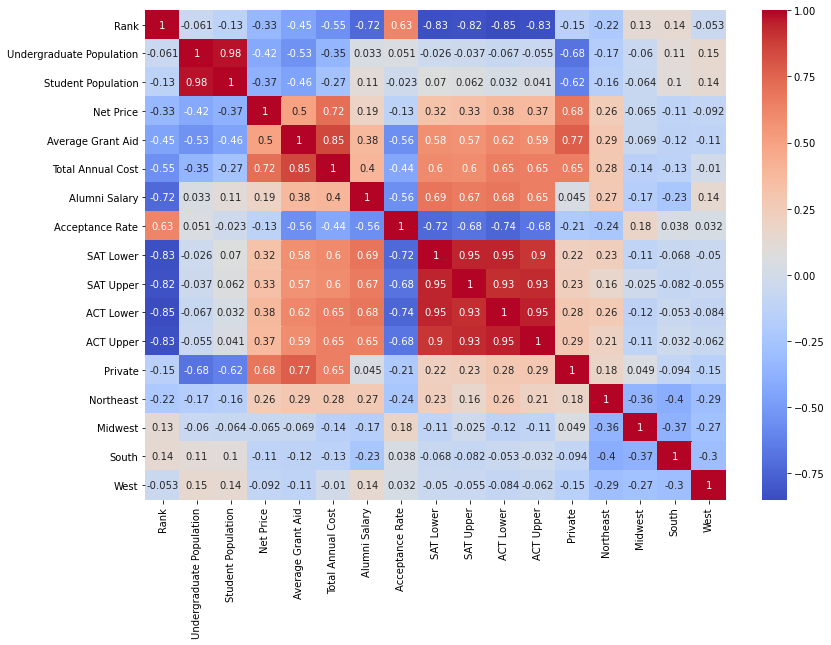

In [256]:
#Examine correlations between variables using a heatmap
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [257]:
#Address missing values (if the graphs look skewed, median is used, otherwise mean is used)
df['SAT Lower'] = df['SAT Lower'].fillna(df['SAT Lower'].median())
df['SAT Upper'] = df['SAT Upper'].fillna(df['SAT Upper'].median())
df['ACT Lower'] = df['ACT Lower'].fillna(df['ACT Lower'].median())
df['ACT Upper'] = df['ACT Upper'].fillna(df['ACT Upper'].median())
df['Alumni Salary'] = df['Alumni Salary'].fillna(df['Alumni Salary'].median())
df['Acceptance Rate'] = df['Acceptance Rate'].fillna(df['Acceptance Rate'].median())
df['Net Price'] = df['Net Price'].fillna(df['Net Price'].mean())
df['Average Grant Aid'] = df['Average Grant Aid'].fillna(df['Average Grant Aid'].mean())
print('Null Values:')
print(df.isnull().sum())

Null Values:
Rank                        0
Name                        0
City                        3
State                       0
Public/Private              0
Undergraduate Population    0
Student Population          0
Net Price                   0
Average Grant Aid           0
Total Annual Cost           0
Alumni Salary               0
Acceptance Rate             0
SAT Lower                   0
SAT Upper                   0
ACT Lower                   0
ACT Upper                   0
Website                     5
Private                     0
Region                      0
Northeast                   0
Midwest                     0
South                       0
West                        0
dtype: int64


In [259]:
#Train, test, and split the data, then scale it
#The models will be used to predict whether or not a college is in the Midwest, as defined by the Census Bureau.
X = df[[
    'Undergraduate Population', 'Student Population', 'Net Price', 'Average Grant Aid',
    'Total Annual Cost', 'Alumni Salary', 'Acceptance Rate',
    'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
    'Rank', 'Private'
]]
y = df['Midwest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [260]:
#Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
log_predict = log.predict(X_test)
log_accuracy = log.score(X_test, y_test)
log_precision = confusion_matrix(y_test, log_predict)[0][0] / (confusion_matrix(y_test, log_predict)[0][0]+confusion_matrix(y_test, log_predict)[1][0])
log_mcc = matthews_corrcoef(y_test, log_predict)
print('Training data accuracy: '+str(round(log.score(X_train, y_train) * 100, 2))+'%')
print('Test data accuracy: '+str(round(log_accuracy * 100, 2))+'%')
print('Test data precision: '+str(round(log_precision*100, 2))+'%')
print('Matthews Correlation: '+str(round(log_mcc, 6)))
print('Confusion Matrix: \n', confusion_matrix(y_test, log_predict))

Training data accuracy: 73.85%
Test data accuracy: 77.69%
Test data precision: 78.29%
Matthews Correlation: -0.04613
Confusion Matrix: 
 [[101   1]
 [ 28   0]]


In [261]:
#Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)
tree_accuracy = tree.score(X_test, y_test)
tree_precision = confusion_matrix(y_test, tree_predict)[0][0] / (confusion_matrix(y_test, tree_predict)[0][0]+confusion_matrix(y_test, tree_predict)[1][0])
tree_mcc = matthews_corrcoef(y_test, tree_predict)
print('Test data accuracy: '+str(round(tree_accuracy * 100, 2))+'%')
print('Test data precision: '+str(round(tree_precision*100, 2))+'%')
print('Matthews Correlation: '+str(round(tree_mcc, 6)))
print('Confusion Matrix: \n', confusion_matrix(y_test, tree_predict))

Test data accuracy: 71.54%
Test data precision: 84.95%
Matthews Correlation: 0.250089
Confusion Matrix: 
 [[79 23]
 [14 14]]


In [262]:
#Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)
forest_accuracy = forest.score(X_test, y_test)
forest_precision = confusion_matrix(y_test, forest_predict)[0][0] / (confusion_matrix(y_test, forest_predict)[0][0]+confusion_matrix(y_test, forest_predict)[1][0])
forest_mcc = matthews_corrcoef(y_test, forest_predict)
print('Test data accuracy: '+str(round(forest_accuracy*100, 2))+'%')
print('Test data precision: '+str(round(forest_precision*100, 2))+'%')
print('Matthews Correlation: '+str(round(forest_mcc, 6)))
print('Confusion Matrix: \n', confusion_matrix(y_test, forest_predict))

Test data accuracy: 78.46%
Test data precision: 83.64%
Matthews Correlation: 0.295217
Confusion Matrix: 
 [[92 10]
 [18 10]]


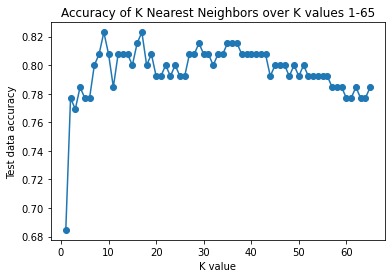

Highest Accuracy: 82.31%
Best k-value: 9
Associated Precision: 84.96%
Associated Matthews Correlation: 0.407292
Confusion Matrix: 
 [[96  6]
 [17 11]]


In [264]:
#K Nearest Neighbors
k_list = range(1,66)
k_accuracies = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_accuracies.append(knn.score(X_test, y_test))
plt.plot(k_list, k_accuracies, marker='o')
plt.xlabel('K value')
plt.ylabel('Test data accuracy')
plt.title('Accuracy of K Nearest Neighbors over K values 1-65')
plt.show()
knn_accuracy = max(k_accuracies)
best_k = accuracies.index(max(k_accuracies)) + 1
print('Highest Accuracy: '+str(round(knn_accuracy * 100, 2))+'%')
print('Best k-value: '+str(best_k))

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
knn_best_predict = knn_best.predict(X_test)
knn_precision = confusion_matrix(y_test, knn_best_predict)[0][0] / (confusion_matrix(y_test, knn_best_predict)[0][0]+confusion_matrix(y_test, knn_best_predict)[1][0])
knn_mcc = matthews_corrcoef(y_test, knn_best_predict)
print('Associated Precision: '+str(round(knn_precision*100, 2))+'%')
print('Associated Matthews Correlation: '+str(round(knn_mcc, 6)))
print('Confusion Matrix: \n', confusion_matrix(y_test, knn_best_predict))

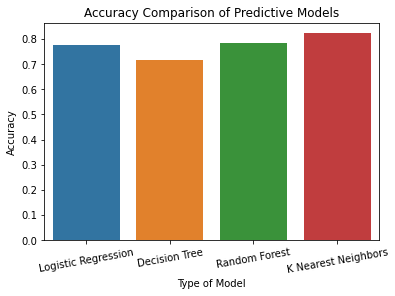

Most Accurate Model: K Nearest Neighbors
Highest Accuracy Achieved: 82.31%


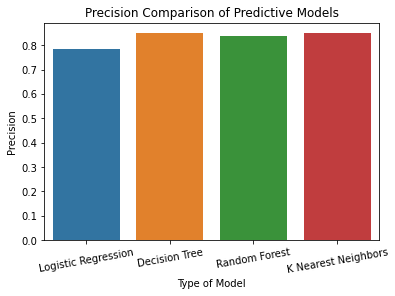

Most Precise Model: K Nearest Neighbors
Highest Precision Achieved: 84.96%


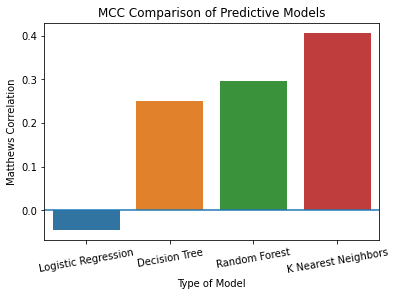

The K Nearest Neighbors model produced the strongest correlation between expected and actual prediction class.
Highest Matthews Correlation achieved: 0.407292


In [265]:
#Comparison of the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbors']
model_accuracies = [log_accuracy, tree_accuracy, forest_accuracy, knn_accuracy]
model_precisions = [log_precision, tree_precision, forest_precision, knn_precision]
model_mccs = [log_mcc, tree_mcc, forest_mcc, knn_mcc]
plt.title('Accuracy Comparison of Predictive Models')
plt.ylabel('Accuracy')
plt.xlabel('Type of Model')
ax1 = sns.barplot(x=models, y=model_accuracies)
ax1.set_xticklabels(labels=models, rotation=10)
plt.show()
plt.clf()
print('Most Accurate Model: '+models[model_accuracies.index(max(model_accuracies))])
print('Highest Accuracy Achieved: '+str(round(max(model_accuracies)*100,2))+'%')
plt.title('Precision Comparison of Predictive Models')
plt.ylabel('Precision')
plt.xlabel('Type of Model')
ax2 = sns.barplot(x=models, y=model_precisions)
ax2.set_xticklabels(labels=models, rotation=10)
plt.show()
plt.clf()
print('Most Precise Model: '+models[model_precisions.index(max(model_precisions))])
print('Highest Precision Achieved: '+str(round(max(model_precisions)*100,2))+'%')
plt.title('MCC Comparison of Predictive Models')
plt.ylabel('Matthews Correlation')
plt.xlabel('Type of Model')
ax3 = sns.barplot(x=models, y=model_mccs)
ax3.set_xticklabels(labels=models, rotation=10)
ax3.axhline(0)
plt.show()
print('The '+models[model_mccs.index(max(model_mccs))]+' model produced the strongest correlation between expected and actual prediction class.')
print('Highest Matthews Correlation achieved: '+str(round(max(model_mccs),6)))

Closing Thoughts
----------------------------

This notebook examines data from the 650 colleges included in the Forbes list of America's Top Colleges for 2019, investigates it, runs four different supervised machine learning models (logistic regression, decision tree, random forest, and K nearest neighbors), and compares their results using accuracy, precision, and Matthews correlation coefficient. 

For the scope of this investigation, I decided to analyze how well these models did at predicting if a college was located in the Midwest, as defined by the United States Census Bureau. Although each model was significantly more accurate and precise than random chance, they performed rather weakly in terms of Matthews correlation. Surprisingly, logistic regression can produce a negative Matthews correlation depending on the random state chosen in the train-test-split function, meaning that it can perform worse than random chance on this metric. At the time of this writing, I must admit that I do not fully understand how this occurred, as my primary educational resource, Codecademy's Data Science Career Path, does not cover Matthews correlation. Furthermore, depending on the random state chosen, the results of this analysis can change entirely, and can even produce errors. For example, in state 42, the logistic regression model predicts that every college in the dataset is in the Midwest, thus producing no true or false negatives and breaking the code. However, this notebook uses random state 123, which indicates that K nearest neighbors performed strongly in accuracy and precision (upwards of 80% in both categories), while producing a somewhat reasonable Matthews correlation of about 0.4. 

So, can these models accurately predict if a college is located in the Midwest? The answer appears to be a definitive "maybe", although they likely beat random guessing most of the time. Perhaps a sample size of 650, including fewer than 200 Midwestern colleges, is not optimal for these models. Additionally, the heatmap that visualizes all of the correlations does not produce anything stronger than +/- 0.3 between location and any quantitative variable, so it is possible that colleges in the Midwest are just not that different from other American colleges in any substantial way. It shocked me that the strongest negative correlation between two areas is -0.4, given that they are mutually exclusive! Overall, I think the most important machine learning concept that this project taught me is that there is a lot more for me to learn about machine learning. 
